# House Price Forecast in Connecticut

In [532]:
#importing libraries
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [533]:
#reading the data frame
data_frame=pd.read_csv('Connecticut.csv')

In [660]:
data_frame

,Date,Median Sale Price,Average Sale Price
0,2001-01-01,214451.78,342552.42
1,2001-02-01,214451.78,349346.53
2,2001-03-01,217493.65,337250.78
3,2001-04-01,220535.52,337112.25
4,2001-05-01,228140.19,334997.97
...,...,...,...
245,2021-06-01,314000.00,467990.01
246,2021-07-01,315000.00,477072.25
247,2021-08-01,315000.00,456800.41
248,2021-09-01,292000.00,401529.19


In [535]:
#data frame info
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                250 non-null    object 
 1   Median Sale Price   250 non-null    float64
 2   Average Sale Price  250 non-null    float64
 3   County              250 non-null    object 
dtypes: float64(2), object(2)
memory usage: 7.9+ KB


We need to remove County feature as it is no longer required for our further process

In [536]:
data_frame=data_frame.drop(['County'],axis=1)

The data type of Date feature is Object, we need to convert that into datetime format in order to forecast the data

In [537]:
data_frame['Date']=pd.to_datetime(data_frame['Date'],format='%Y/%m/%d')

In [538]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price
0,2001-01-01,214451.78,342552.42
1,2001-02-01,214451.78,349346.53
2,2001-03-01,217493.65,337250.78
3,2001-04-01,220535.52,337112.25
4,2001-05-01,228140.19,334997.97


## Extracting the Median and Average Sale Price from the data frame

In [539]:
median_data=data_frame[['Date','Median Sale Price']]
average_data=data_frame[['Date','Average Sale Price']]

In [540]:
median_data.head()

,Date,Median Sale Price
0,2001-01-01,214451.78
1,2001-02-01,214451.78
2,2001-03-01,217493.65
3,2001-04-01,220535.52
4,2001-05-01,228140.19


In [541]:
average_data.head()

,Date,Average Sale Price
0,2001-01-01,342552.42
1,2001-02-01,349346.53
2,2001-03-01,337250.78
3,2001-04-01,337112.25
4,2001-05-01,334997.97


In [542]:
#Setting the Date feature as Index

In [543]:
median_data=median_data.set_index('Date')
average_data=average_data.set_index('Date')

In [592]:
median_data.head(50)

,Median Sale Price
Date,
2001-08-01,36502.43
2001-09-01,25855.89
2001-10-01,16315.83
2001-11-01,9125.61
2001-12-01,2281.40
2002-01-01,-11457.01
2002-02-01,-18867.39
2002-03-01,-15917.88
2002-04-01,-8265.43


In [545]:
average_data.head()

,Average Sale Price
Date,
2001-01-01,342552.42
2001-02-01,349346.53
2001-03-01,337250.78
2001-04-01,337112.25
2001-05-01,334997.97


### Checking the trends

## Median Sale Price trend

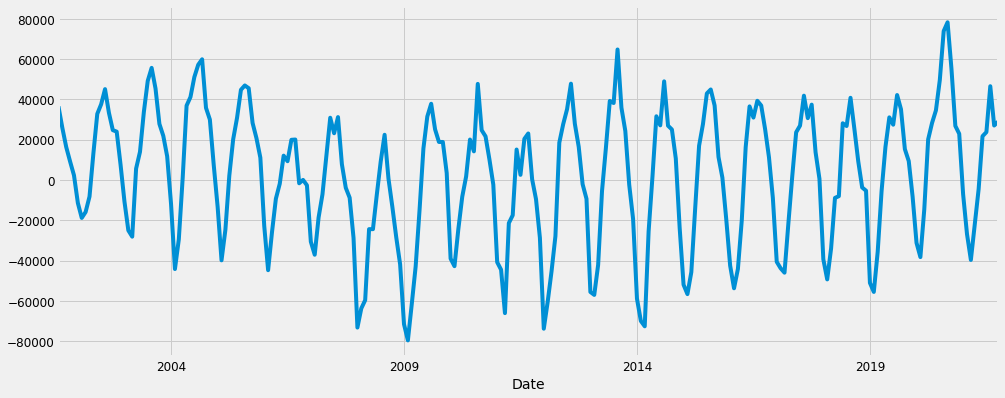

In [597]:
y=median_data['Median Sale Price']
y.plot(figsize=(15,6))
plt.show()

## Average Sale Price trend

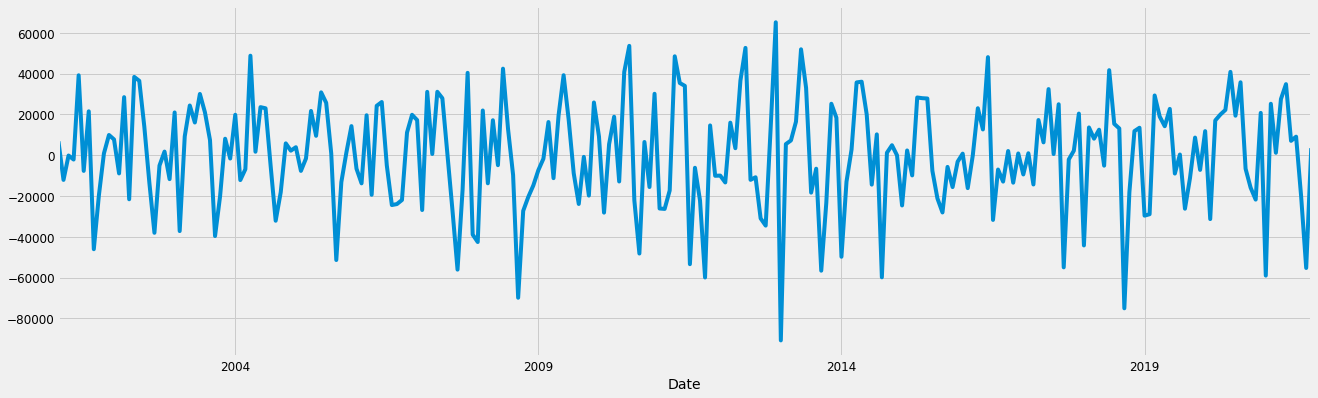

In [599]:
y=average_data['Average Sale Price']
y.plot(figsize=(20,6))
plt.show()

## Data validation and testing

We need to check whether the data is stationary or not. To check that, we use adfuller test

In [550]:
from statsmodels.tsa.stattools import adfuller

In [551]:
#h0=It is not stationary
#h1=It is stationary
def adfuller_test(data):
    results=adfuller(data)
    h0='It is not stationary'
    h1='It is stationary'
    labels=['test_statistic','p value','lags used','number of observations used']
    for lab,val in zip(labels,results[:4]):
        print('{} : {}'.format(lab,val))
    print('---------------------------------------------------')   
    print('p value',results[1])
    if results[1]<=0.05:
        print('Reject h0')
        print(h1)
        print('Weak evidence that the given data is not stationary')
        
    else:
        print('Accecpt h0')
        print(h0)
        print('Strong evidence that the given data is not stationary')
        

In [552]:
#adfuller test for median_data
for val in range(1,12):
    print('diff value: {}'.format(val))
    data=median_data.copy()
    data['Median Sale Price']=data['Median Sale Price'].diff(periods=val)
    adfuller_test(data['Median Sale Price'].dropna())
    print('----------------------------------------------------------')

diff value: 1
test_statistic : -2.4031624239921325
p value : 0.14084582660519285
lags used : 12
number of observations used : 236
---------------------------------------------------
p value 0.14084582660519285
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary
----------------------------------------------------------
diff value: 2
test_statistic : -2.452102941634735
p value : 0.12756721921485742
lags used : 11
number of observations used : 236
---------------------------------------------------
p value 0.12756721921485742
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary
----------------------------------------------------------
diff value: 3
test_statistic : -2.6044498295932255
p value : 0.09208106142000189
lags used : 14
number of observations used : 232
---------------------------------------------------
p value 0.09208106142000189
Accecpt h0
It is not stationary
Strong evidence that the given data is not statio

During the loop, the data is getting stationary, when the values are differed from 7 to 11. So, as 7 is enough to differ the data to make it stationary

In [553]:
#adfuller test for average_data
for val in range(1,12):
    print('diff value: {}'.format(val))
    data=average_data.copy()
    data['Average Sale Price']=data['Average Sale Price'].diff(periods=val)
    adfuller_test(data['Average Sale Price'].dropna())
    print('----------------------------------------------------------')

diff value: 1
test_statistic : -3.4168467758772154
p value : 0.010397798690784204
lags used : 12
number of observations used : 236
---------------------------------------------------
p value 0.010397798690784204
Reject h0
It is stationary
Weak evidence that the given data is not stationary
----------------------------------------------------------
diff value: 2
test_statistic : -3.704188946241896
p value : 0.0040546171910736785
lags used : 15
number of observations used : 232
---------------------------------------------------
p value 0.0040546171910736785
Reject h0
It is stationary
Weak evidence that the given data is not stationary
----------------------------------------------------------
diff value: 3
test_statistic : -3.8121393468757976
p value : 0.0027855271780331432
lags used : 14
number of observations used : 232
---------------------------------------------------
p value 0.0027855271780331432
Reject h0
It is stationary
Weak evidence that the given data is not stationary
------

During the loop, the data is getting stationary, when the values are differed from 1 to 11. So, as 1 is enough to differ the data to make it stationary

In [554]:
average_data['Average Sale Price']=average_data['Average Sale Price'].diff(periods=1)
average_data=average_data.dropna()
median_data['Median Sale Price']=median_data['Median Sale Price'].diff(periods=7)
median_data=median_data.dropna()

In [555]:
median_data

,Median Sale Price
Date,
2001-08-01,36502.43
2001-09-01,25855.89
2001-10-01,16315.83
2001-11-01,9125.61
2001-12-01,2281.40
...,...
2021-06-01,21682.97
2021-07-01,23723.25
2021-08-01,46500.00


In [556]:
average_data

,Average Sale Price
Date,
2001-02-01,6794.11
2001-03-01,-12095.75
2001-04-01,-138.53
2001-05-01,-2114.28
2001-06-01,39187.18
...,...
2021-06-01,7054.15
2021-07-01,9082.24
2021-08-01,-20271.84


## Checking the trends again

### Median Sale Price data

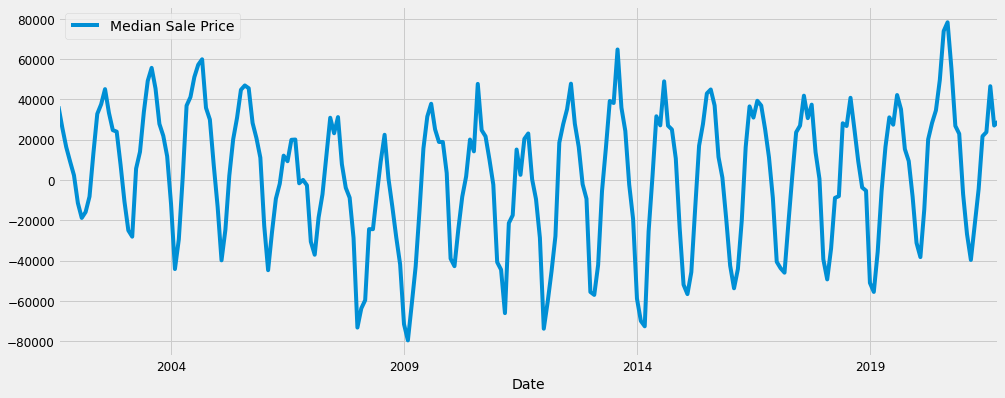

In [558]:
median_data.plot(figsize=(15,6))
plt.show()

## Average sale price data

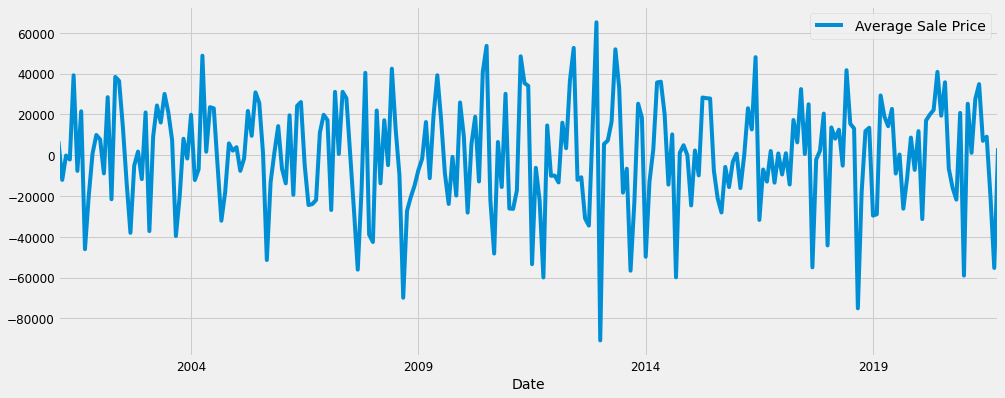

In [559]:
average_data.plot(figsize=(15,6))
plt.show()

## Checking the auto correlation plot

In [561]:
from pandas.plotting import autocorrelation_plot

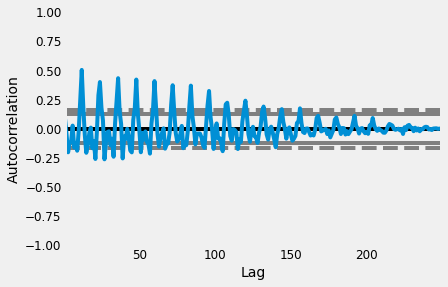

In [562]:
autocorrelation_plot(average_data);

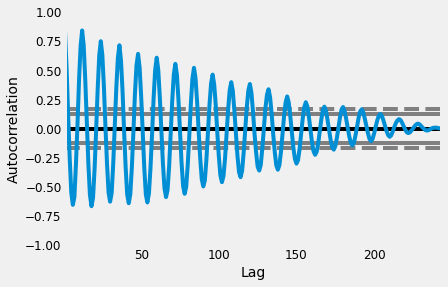

In [563]:
autocorrelation_plot(median_data);

## Plotting autocorrelation and partial_autocorrelation for the seasonal(stationary data)

## Median data

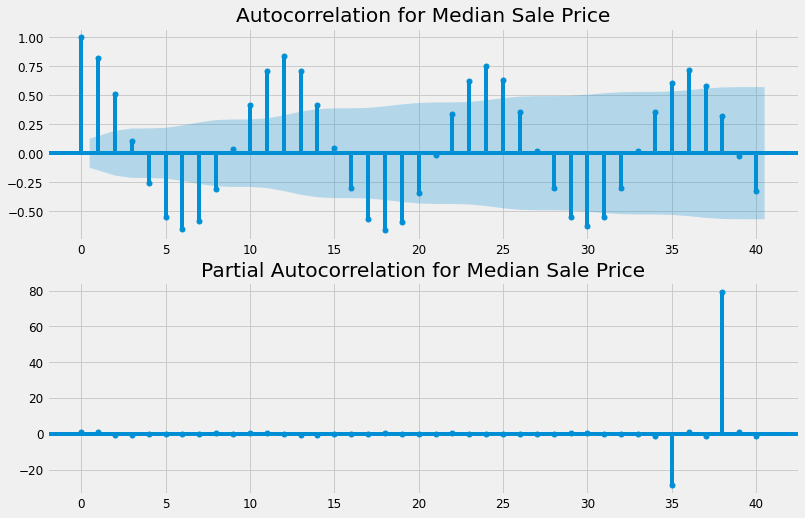

In [565]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(median_data,lags=40,ax=ax1,title='Autocorrelation for Median Sale Price')
ax2 = fig.add_subplot(212)
fig = plot_pacf(median_data,lags=40,ax=ax2,title='Partial Autocorrelation for Median Sale Price')

- When we see partial autocorrelation plot, we can see that there is sudden shrink at lag value 35. So, we consider p=35.
- In Autocorrelation plot, we can see that exponential decrease till lag 3. So, we consider q=3
- And to convert the data into stationary we used differed the data by 7 values. So, d=7

## Average data

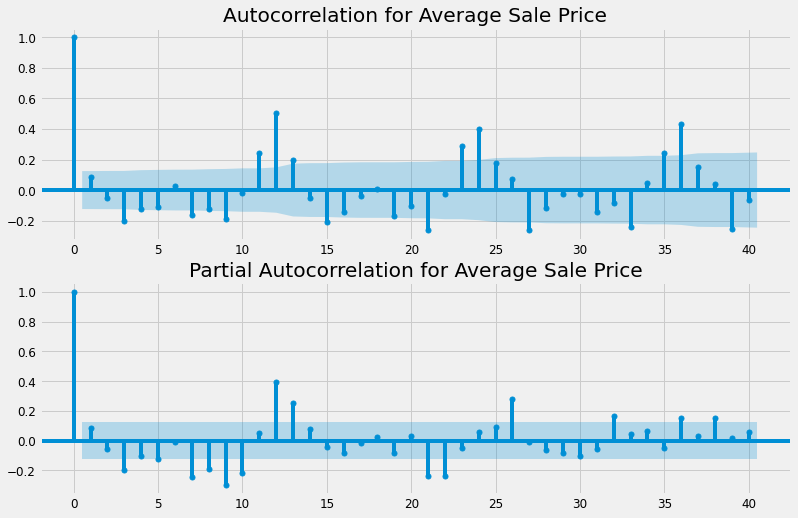

In [566]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(average_data,lags=40,ax=ax1,title='Autocorrelation for Average Sale Price')
ax2 = fig.add_subplot(212)
fig = plot_pacf(average_data,lags=40,ax=ax2,title='Partial Autocorrelation for Average Sale Price')

- We can take p=1 because, there is sudden shrink of value from 0 to 1 in Partial Autocorrelation plot.
- We can take q=0 or 1 because, there is sudden decrease from 0 to 1 in Auto Correlation plot. 
- d=1 because we have differed the data by only 1 to make it stationary.

In [567]:
median_data

,Median Sale Price
Date,
2001-08-01,36502.43
2001-09-01,25855.89
2001-10-01,16315.83
2001-11-01,9125.61
2001-12-01,2281.40
...,...
2021-06-01,21682.97
2021-07-01,23723.25
2021-08-01,46500.00


## Forecasting the median sale price

In [568]:
from statsmodels.tsa.arima.model import ARIMA
#splitting the total median data.
train_data=median_data['Median Sale Price']
test_data=median_data['Median Sale Price'].iloc[180:]
#initializing the model to train
model=ARIMA(train_data,order=(35,7,3));
#training the data and assigned to model_fit var.
model_fit=model.fit()
data=median_data.copy()
#predicting using test data
data['Forecasted data']=model_fit.predict(start=181,end=243)
#model evaluation
#100-(100*(sum([abs(((i-j)/j)) for i,j in zip(data['Forecasted_data'].dropna(),test_data)]))/len(test_data))
mape = np.mean(np.abs(data['Forecasted data'].dropna() - test_data)/np.abs(test_data))*100
accuracy=100-mape
print('Accuracy: {}%'.format(round(accuracy,2)))

Accuracy: 41.09%


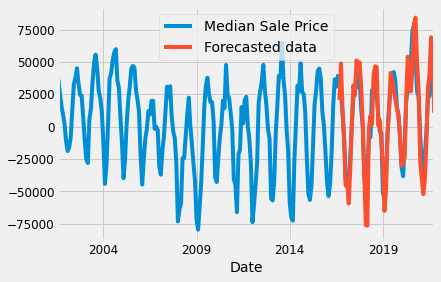

In [569]:
data.plot();

In [570]:
#data=model_fit.predict(start=244,end=280,dynamic=True)

In [576]:
dates=[]
for year in range(2001,2025):
    for month in range(1,13):
        if (year==2024)&(month>3):
            pass
        else:
            if month<10:
                print(str(year)+'-0'+str(month)+'-01')
                dates.append(str(year)+'-0'+str(month)+'-01')
            else:
                print(str(year)+'-'+str(month)+'-01')
                dates.append(str(year)+'-'+str(month)+'-01')

2001-01-01
2001-02-01
2001-03-01
2001-04-01
2001-05-01
2001-06-01
2001-07-01
2001-08-01
2001-09-01
2001-10-01
2001-11-01
2001-12-01
2002-01-01
2002-02-01
2002-03-01
2002-04-01
2002-05-01
2002-06-01
2002-07-01
2002-08-01
2002-09-01
2002-10-01
2002-11-01
2002-12-01
2003-01-01
2003-02-01
2003-03-01
2003-04-01
2003-05-01
2003-06-01
2003-07-01
2003-08-01
2003-09-01
2003-10-01
2003-11-01
2003-12-01
2004-01-01
2004-02-01
2004-03-01
2004-04-01
2004-05-01
2004-06-01
2004-07-01
2004-08-01
2004-09-01
2004-10-01
2004-11-01
2004-12-01
2005-01-01
2005-02-01
2005-03-01
2005-04-01
2005-05-01
2005-06-01
2005-07-01
2005-08-01
2005-09-01
2005-10-01
2005-11-01
2005-12-01
2006-01-01
2006-02-01
2006-03-01
2006-04-01
2006-05-01
2006-06-01
2006-07-01
2006-08-01
2006-09-01
2006-10-01
2006-11-01
2006-12-01
2007-01-01
2007-02-01
2007-03-01
2007-04-01
2007-05-01
2007-06-01
2007-07-01
2007-08-01
2007-09-01
2007-10-01
2007-11-01
2007-12-01
2008-01-01
2008-02-01
2008-03-01
2008-04-01
2008-05-01
2008-06-01
2008-07-01

In [578]:
final_data=pd.DataFrame(index=dates)

In [579]:
final_data.index=pd.to_datetime(final_data.index,format='%Y/%m/%d')

In [580]:
final_data['Forecast']=model_fit.predict(start=243,end=280,dynamic=True)

In [581]:
data.tail(50)

,Median Sale Price,Forecasted data
Date,,
2017-09-01,30646.72,44588.599397
2017-10-01,37347.26,49636.615295
2017-11-01,13730.61,30577.175734
2017-12-01,562.95,2052.904236
2018-01-01,-39402.81,-37962.115657
2018-02-01,-49374.23,-76227.042837
2018-03-01,-33986.16,-76450.002258
2018-04-01,-8927.93,-917.727273
2018-05-01,-8069.84,8405.436427


In [582]:
final_data=pd.concat([data['Median Sale Price'],final_data['Forecast']],axis=1)

In [583]:
final_data

,Median Sale Price,Forecast
2001-01-01,NaN,NaN
2001-02-01,NaN,NaN
2001-03-01,NaN,NaN
2001-04-01,NaN,NaN
2001-05-01,NaN,NaN
...,...,...
2023-11-01,NaN,-2.970442e+07
2023-12-01,NaN,-3.560557e+07
2024-01-01,NaN,-4.242943e+07
2024-02-01,NaN,-5.025258e+07


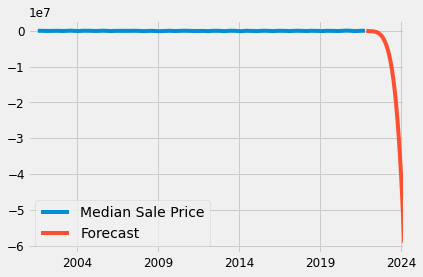

In [584]:
final_data.plot();

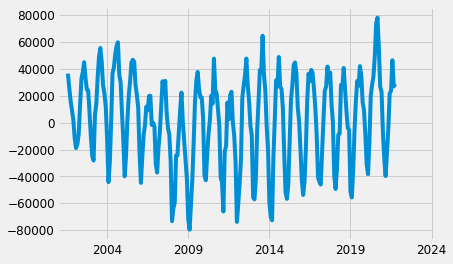

In [588]:
final_data['Median Sale Price'].plot();

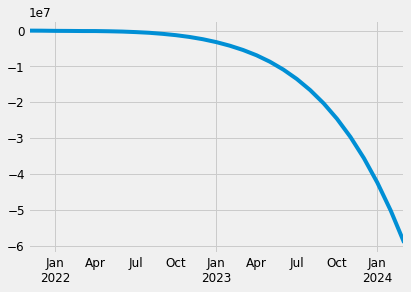

In [641]:
final_data['Forecast'].dropna().plot();

## Forecasting the Average Sale Price

In [675]:
from statsmodels.tsa.arima.model import ARIMA
#splitting the total median data.
train_data=average_data['Average Sale Price']
test_data=average_data['Average Sale Price'].iloc[180:]
#initializing the model to train
model=ARIMA(train_data,order=(14,1,18));
#training the data and assigned to model_fit var.
model_fit=model.fit()
data=median_data.copy()
#predicting using test data
data['Forecasted data']=model_fit.predict(start=181,end=243)
#model evaluation
#100-(100*(sum([abs(((i-j)/j)) for i,j in zip(data['Forecasted_data'].dropna(),test_data)]))/len(test_data))
mape = np.mean(np.abs(data['Forecasted data'].dropna() - test_data)/np.abs(test_data))*100
accuracy=100-mape
print('Accuracy: {}%'.format(round(accuracy,2)))

Accuracy: -182.6%


In [671]:
def forecast(p,q):
    model=ARIMA(train_data,order=(p,1,q));
#training the data and assigned to model_fit var.
    model_fit=model.fit()
    data=median_data.copy()
#predicting using test data
    data['Forecasted data']=model_fit.predict(start=181,end=243)
#model evaluation
#100-(100*(sum([abs(((i-j)/j)) for i,j in zip(data['Forecasted_data'].dropna(),test_data)]))/len(test_data))
    mape = np.mean(np.abs(data['Forecasted data'].dropna() - test_data)/np.abs(test_data))*100
    accuracy=100-mape
    
    if round(accuracy,2)>0:
        print('p:{}, q:{}'.format(p,q))
        print('Accuracy: {}%'.format(round(accuracy,2)))

In [677]:
for p in range(14,21):
    for q in range(0,21):
        if p!=13:
            print('p:{}, q:{}'.format(p,q))
            forecast(p,q)   

p:14, q:0
p:14, q:1
p:14, q:2
p:14, q:3
p:14, q:4
p:14, q:5
p:14, q:6
p:14, q:7
p:14, q:8
p:14, q:9
p:14, q:10
p:14, q:11
p:14, q:12
p:14, q:13
p:14, q:14
p:14, q:15
p:14, q:16
p:14, q:17
p:14, q:18
p:14, q:19
p:14, q:20
p:15, q:0
p:15, q:1
p:15, q:2
p:15, q:3
p:15, q:4
p:15, q:5
p:15, q:6
p:15, q:7
p:15, q:8
p:15, q:9
p:15, q:10
p:15, q:11
p:15, q:12
p:15, q:13
p:15, q:14
p:15, q:15
p:15, q:16
p:15, q:17
p:15, q:18
p:15, q:19
p:15, q:20
p:16, q:0
p:16, q:1
p:16, q:2
p:16, q:3
p:16, q:4
p:16, q:5
p:16, q:6
p:16, q:7
p:16, q:8
p:16, q:9
p:16, q:10
p:16, q:11
p:16, q:12
p:16, q:13
p:16, q:14
p:16, q:15
p:16, q:16
p:16, q:17
p:16, q:18
p:16, q:19
p:16, q:20
p:17, q:0
p:17, q:1
p:17, q:2
p:17, q:3
p:17, q:4
p:17, q:5
p:17, q:6
p:17, q:7
p:17, q:8
p:17, q:9
p:17, q:10
p:17, q:11
p:17, q:12
p:17, q:13
p:17, q:14
p:17, q:15
p:17, q:16
p:17, q:17
p:17, q:18
p:17, q:19
p:17, q:20
p:18, q:0
p:18, q:1
p:18, q:2
p:18, q:3
p:18, q:4
p:18, q:5
p:18, q:6
p:18, q:7
p:18, q:8
p:18, q:9
p:18, q:10
p:18,

ARIMA model cannot work well for the given data such Median Sale Price and Average Sale Price where the values got differed by 7 and 1.

## Forecasting the values using SARIMA

In [683]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### SARIMAX for Median Sale Price

In [707]:
model=SARIMAX(median_data['Median Sale Price'],order=(35,7,3),seasonal_order=(35,7,3,12))

ValueError: Invalid model: autoregressive lag(s) {24, 12} are in both the seasonal and non-seasonal autoregressive components.

In [ ]:
result=model.fit()

In [ ]:
data['Forecasted data']=result.predict(start=181,end=243,dynamic=True)
#model evaluation
#100-(100*(sum([abs(((i-j)/j)) for i,j in zip(data['Forecasted_data'].dropna(),test_data)]))/len(test_data))
mape = np.mean(np.abs(data['Forecasted data'].dropna() - test_data)/np.abs(test_data))*100
accuracy=100-mape
accuracy

In [704]:
accuracy_=[]
def hyper_parameter_tuning(p,q):
    model=SARIMAX(median_data['Median Sale Price'],order=(p,1,q),seasonal_order=(p,1,q,12))
    result=model.fit()
    data['Forecasted data']=result.predict(start=181,end=243,dynamic=True)
#model evaluation
#100-(100*(sum([abs(((i-j)/j)) for i,j in zip(data['Forecasted_data'].dropna(),test_data)]))/len(test_data))
    mape = np.mean(np.abs(data['Forecasted data'].dropna() - test_data)/np.abs(test_data))*100
    accuracy=100-mape
    if accuracy>0:
        print('p:{}, q:{}'.format(p,q))
        print(accuracy)
        accuracy_.append(accuracy)

In [705]:
for p in range(0,10):
    for q in range(0,10):
        hyper_parameter_tuning(p,q)

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03320D+01    |proj g|=  4.13092D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   4.131D-06   1.033D+01
  F =   10.332032902131585     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01520D+01    |proj g|=  7.22345D-02

At iterate    5    f=  1.01407D+01    |proj g|=  1.13531D-02

At iterate   10    f=  1.01403D+01    |proj g|=  2.27692D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     12      1     0     0   2.277D-05   1.014D+01
  F =   10.140313542344051     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  1.01255D+01    |proj g|=  6.72267D-03

At iterate   10    f=  1.01253D+01    |proj g|=  3.55541D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     11     13      1     0     0   2.474D-05   1.013D+01
  F =   10.125340961767066     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02008D+01    |proj g|=  2.09951D-01

At iterate    5    f=  1.01239D+01    |proj g|=  2.80570D-02

At iterate   10    f=  1.01213D+01    |proj g|=  3.95323D-03

At iterate   15    f=  1.01190D+01    |proj g|=  2.82252D-02

At iterate   20    f=  1.01163D+01    |proj g|=  2.49151D-03

At iterate   25    f=  1.01163D+01    |proj g|=  3.82810D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     26     32      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02340D+01    |proj g|=  2.80514D-01

At iterate    5    f=  1.01184D+01    |proj g|=  2.63341D-02

At iterate   10    f=  1.01137D+01    |proj g|=  1.93290D-03

At iterate   15    f=  1.01136D+01    |proj g|=  2.83669D-04

At iterate   20    f=  1.01136D+01    |proj g|=  3.68495D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     20     24      1     0     0   3.685D-05   1.011D+01
  F =   10.113625408730259     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02285D+01    |proj g|=  2.66656D-01

At iterate    5    f=  1.01111D+01    |proj g|=  1.69713D-02

At iterate   10    f=  1.01068D+01    |proj g|=  3.95551D-03

At iterate   15    f=  1.01065D+01    |proj g|=  4.45273D-04

At iterate   20    f=  1.01064D+01    |proj g|=  6.48294D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     20     23      1     0     0   6.483D-05   1.011D+01
  F =   10.106447938469755     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  9.99037D+00    |proj g|=  4.58759D-02

At iterate   10    f=  9.96869D+00    |proj g|=  1.41820D-02

At iterate   15    f=  9.96476D+00    |proj g|=  1.08760D-02

At iterate   20    f=  9.96333D+00    |proj g|=  6.59136D-03

At iterate   25    f=  9.96310D+00    |proj g|=  3.64247D-03

At iterate   30    f=  9.96264D+00    |proj g|=  6.09034D-03

At iterate   35    f=  9.96261D+00    |proj g|=  9.80159D-04

At iterate   40    f=  9.96259D+00    |proj g|=  1.03173D-03

At iterate   45    f=  9.96258D+00    |proj g|=  2.53635D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     49     54   

 This problem is unconstrained.



At iterate    5    f=  9.98123D+00    |proj g|=  4.57039D-02

At iterate   10    f=  9.96163D+00    |proj g|=  1.69365D-02

At iterate   15    f=  9.95937D+00    |proj g|=  2.16700D-02

At iterate   20    f=  9.95875D+00    |proj g|=  3.96173D-03

At iterate   25    f=  9.95860D+00    |proj g|=  2.72145D-03

At iterate   30    f=  9.95851D+00    |proj g|=  5.96924D-04

At iterate   35    f=  9.95850D+00    |proj g|=  9.12697D-04

At iterate   40    f=  9.95849D+00    |proj g|=  4.72085D-04

At iterate   45    f=  9.95849D+00    |proj g|=  2.10937D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     47     52   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03478D+01    |proj g|=  5.61487D-01

At iterate    5    f=  9.98824D+00    |proj g|=  4.46204D-02

At iterate   10    f=  9.96899D+00    |proj g|=  1.00146D-02

At iterate   15    f=  9.96725D+00    |proj g|=  1.77051D-02

At iterate   20    f=  9.96588D+00    |proj g|=  7.12256D-03

At iterate   25    f=  9.96572D+00    |proj g|=  2.75905D-03

At iterate   30    f=  9.96559D+00    |proj g|=  2.40598D-03

At iterate   35    f=  9.96557D+00    |proj g|=  1.22038D-03

At iterate   40    f=  9.96556D+00    |proj g|=  3.45517D-04

At iterate   45    f=  9.96556D+00    |proj g|=  7.27640D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01985D+01    |proj g|=  3.76430D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      6      1     0     0   1.133D-05   1.020D+01
  F =   10.196301328090184     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01380D+01    |proj g|=  7.27301D-02

At iterate    5    f=  1.01315D+01    |proj g|=  2.29197D-02

At iterate   10    f=  1.01246D+01    |proj g|=  7.15135D-03

At iterate   15    f=  1.01227D+01    |proj g|=  2.76943D-03

At iterate   20    f=  1.01226D+01    |proj g|=  2.55699D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     20     24      1     0     0   2.557D-05   1.012D+01
  F =   10.122622628890408     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01481D+01    |proj g|=  8.56379D-02

At iterate    5    f=  1.01321D+01    |proj g|=  4.41587D-02

At iterate   10    f=  1.01209D+01    |proj g|=  1.52860D-02

At iterate   15    f=  1.01139D+01    |proj g|=  1.17569D-02

At iterate   20    f=  1.01120D+01    |proj g|=  2.17675D-03

At iterate   25    f=  1.01115D+01    |proj g|=  1.70078D-02

At iterate   30    f=  1.01099D+01    |proj g|=  3.20731D-03

At iterate   35    f=  1.01098D+01    |proj g|=  8.15097D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02360D+01    |proj g|=  1.34935D-01

At iterate    5    f=  1.01108D+01    |proj g|=  1.17599D-02

At iterate   10    f=  1.01081D+01    |proj g|=  3.99216D-03

At iterate   15    f=  1.01074D+01    |proj g|=  2.96206D-03

At iterate   20    f=  1.01070D+01    |proj g|=  3.63420D-03

At iterate   25    f=  1.01069D+01    |proj g|=  2.45274D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     29     33      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01834D+01    |proj g|=  2.21090D-01

At iterate    5    f=  1.01121D+01    |proj g|=  4.13269D-02

At iterate   10    f=  1.01077D+01    |proj g|=  4.97065D-03

At iterate   15    f=  1.01075D+01    |proj g|=  1.85081D-03

At iterate   20    f=  1.01075D+01    |proj g|=  4.62415D-04

At iterate   25    f=  1.01075D+01    |proj g|=  9.44565D-04

At iterate   30    f=  1.01074D+01    |proj g|=  3.86661D-04

At iterate   35    f=  1.01074D+01    |proj g|=  5.39753D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02937D+01    |proj g|=  3.78437D-01

At iterate    5    f=  1.01137D+01    |proj g|=  3.38696D-02

At iterate   10    f=  1.01064D+01    |proj g|=  2.32120D-02

At iterate   15    f=  1.00891D+01    |proj g|=  1.20008D-01

At iterate   20    f=  1.00696D+01    |proj g|=  3.78765D-02

At iterate   25    f=  1.00661D+01    |proj g|=  2.83926D-02

At iterate   30    f=  1.00644D+01    |proj g|=  7.60095D-03

At iterate   35    f=  1.00633D+01    |proj g|=  6.64942D-03

At iterate   40    f=  1.00620D+01    |proj g|=  1.50623D-02

At iterate   45    f=  1.00616D+01    |proj g|=  1.47934D-02

At iterate   50    f=  1.00614D+01    |proj g|=  2.85132D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00971D+01    |proj g|=  3.74688D-01

At iterate    5    f=  9.94388D+00    |proj g|=  4.70148D-02

At iterate   10    f=  9.93021D+00    |proj g|=  2.18601D-02

At iterate   15    f=  9.92561D+00    |proj g|=  8.34028D-03

At iterate   20    f=  9.92544D+00    |proj g|=  2.64216D-03

At iterate   25    f=  9.92511D+00    |proj g|=  5.83494D-03

At iterate   30    f=  9.92494D+00    |proj g|=  5.90603D-03

At iterate   35    f=  9.92490D+00    |proj g|=  1.22105D-03

At iterate   40    f=  9.92489D+00    |proj g|=  2.43253D-03

At iterate   45    f=  9.92484D+00    |proj g|=  2.68824D-03

At iterate   50    f=  9.92481D+00    |proj g|=  8.52972D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00958D+01    |proj g|=  4.46919D-01

At iterate    5    f=  9.95192D+00    |proj g|=  4.97717D-02

At iterate   10    f=  9.93789D+00    |proj g|=  3.09964D-02

At iterate   15    f=  9.93005D+00    |proj g|=  8.81049D-03

At iterate   20    f=  9.92928D+00    |proj g|=  8.47548D-03

At iterate   25    f=  9.92872D+00    |proj g|=  1.27822D-02

At iterate   30    f=  9.92772D+00    |proj g|=  4.70585D-03

At iterate   35    f=  9.92760D+00    |proj g|=  1.35524D-03

At iterate   40    f=  9.92752D+00    |proj g|=  4.26258D-03

At iterate   45    f=  9.92744D+00    |proj g|=  8.86901D-03

At iterate   50    f=  9.92709D+00    |proj g|=  1.53636D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01064D+01    |proj g|=  3.30779D-01

At iterate    5    f=  9.96978D+00    |proj g|=  1.01543D-01

At iterate   10    f=  9.95218D+00    |proj g|=  2.98352D-02

At iterate   15    f=  9.94448D+00    |proj g|=  5.60725D-02

At iterate   20    f=  9.94051D+00    |proj g|=  3.37836D-02

At iterate   25    f=  9.93988D+00    |proj g|=  5.34390D-03

At iterate   30    f=  9.93967D+00    |proj g|=  5.94408D-03

At iterate   35    f=  9.93950D+00    |proj g|=  2.48708D-03

At iterate   40    f=  9.93935D+00    |proj g|=  4.78927D-03

At iterate   45    f=  9.93908D+00    |proj g|=  2.98233D-02

At iterate   50    f=  9.93868D+00    |proj g|=  9.88248D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6      8      1     0     0   1.784D-05   1.016D+01
  F =   10.159825861103588     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01862D+01    |proj g|=  1.80432D-01


 This problem is unconstrained.



At iterate    5    f=  1.01448D+01    |proj g|=  5.48686D-02

At iterate   10    f=  1.01355D+01    |proj g|=  1.50545D-04

At iterate   15    f=  1.01355D+01    |proj g|=  6.08917D-03

At iterate   20    f=  1.01352D+01    |proj g|=  2.13229D-02

At iterate   25    f=  1.01257D+01    |proj g|=  2.72728D-02

At iterate   30    f=  1.01206D+01    |proj g|=  9.85525D-03

At iterate   35    f=  1.01202D+01    |proj g|=  1.22766D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     48      1     0     0   2.499D-05   1.012D+01
  F =   10.120239795903732     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01688D+01    |proj g|=  1.05797D-01

At iterate    5    f=  1.01265D+01    |proj g|=  1.62184D-02

At iterate   10    f=  1.01129D+01    |proj g|=  1.64952D-02

At iterate   15    f=  1.01060D+01    |proj g|=  2.96018D-03

At iterate   20    f=  1.01058D+01    |proj g|=  3.27813D-04

At iterate   25    f=  1.01058D+01    |proj g|=  7.61695D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     27     30      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  1.01029D+01    |proj g|=  1.51622D-02

At iterate   10    f=  1.00939D+01    |proj g|=  3.99213D-02

At iterate   15    f=  1.00870D+01    |proj g|=  3.08628D-02

At iterate   20    f=  1.00710D+01    |proj g|=  4.08140D-02

At iterate   25    f=  1.00497D+01    |proj g|=  8.48815D-02

At iterate   30    f=  1.00404D+01    |proj g|=  1.58213D-02

At iterate   35    f=  1.00390D+01    |proj g|=  8.02691D-03

At iterate   40    f=  1.00382D+01    |proj g|=  8.61671D-03

At iterate   45    f=  1.00374D+01    |proj g|=  5.67967D-02

At iterate   50    f=  1.00373D+01    |proj g|=  1.62650D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01507D+01    |proj g|=  1.99596D-01

At iterate    5    f=  1.00846D+01    |proj g|=  2.94940D-02

At iterate   10    f=  1.00758D+01    |proj g|=  1.14126D-01

At iterate   15    f=  1.00737D+01    |proj g|=  3.47470D-02

At iterate   20    f=  1.00711D+01    |proj g|=  4.68865D-02

At iterate   25    f=  1.00654D+01    |proj g|=  1.10503D-01

At iterate   30    f=  1.00640D+01    |proj g|=  4.08821D-02

At iterate   35    f=  1.00623D+01    |proj g|=  6.65693D-02

At iterate   40    f=  1.00614D+01    |proj g|=  1.01166D-02

At iterate   45    f=  1.00613D+01    |proj g|=  2.84449D-04

At iterate   50    f=  1.00613D+01    |proj g|=  4.67806D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02049D+01    |proj g|=  2.25642D-01

At iterate    5    f=  1.00963D+01    |proj g|=  3.01298D-02

At iterate   10    f=  1.00863D+01    |proj g|=  1.99136D-02

At iterate   15    f=  1.00808D+01    |proj g|=  1.25877D-02

At iterate   20    f=  1.00741D+01    |proj g|=  3.15833D-02

At iterate   25    f=  1.00723D+01    |proj g|=  9.24636D-03

At iterate   30    f=  1.00717D+01    |proj g|=  6.72833D-03

At iterate   35    f=  1.00716D+01    |proj g|=  2.12488D-03

At iterate   40    f=  1.00714D+01    |proj g|=  1.00688D-02

At iterate   45    f=  1.00712D+01    |proj g|=  4.04377D-03

At iterate   50    f=  1.00711D+01    |proj g|=  8.51866D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03748D+01    |proj g|=  4.11451D-01

At iterate    5    f=  1.01120D+01    |proj g|=  1.09115D-01

At iterate   10    f=  1.00933D+01    |proj g|=  3.04944D-02

At iterate   15    f=  1.00790D+01    |proj g|=  3.89739D-02

At iterate   20    f=  1.00648D+01    |proj g|=  6.06960D-02

At iterate   25    f=  1.00536D+01    |proj g|=  3.78289D-02

At iterate   30    f=  1.00526D+01    |proj g|=  1.30636D-02

At iterate   35    f=  1.00520D+01    |proj g|=  4.71224D-02

At iterate   40    f=  1.00511D+01    |proj g|=  1.92072D-02

At iterate   45    f=  1.00498D+01    |proj g|=  1.45185D-02

At iterate   50    f=  1.00477D+01    |proj g|=  9.46283D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00973D+01    |proj g|=  3.71619D-01

At iterate    5    f=  9.94344D+00    |proj g|=  8.45865D-02

At iterate   10    f=  9.92959D+00    |proj g|=  2.00656D-02

At iterate   15    f=  9.92507D+00    |proj g|=  1.12412D-02

At iterate   20    f=  9.92496D+00    |proj g|=  6.31561D-03

At iterate   25    f=  9.92469D+00    |proj g|=  1.36714D-02

At iterate   30    f=  9.92433D+00    |proj g|=  6.64544D-03

At iterate   35    f=  9.92416D+00    |proj g|=  7.80017D-03

At iterate   40    f=  9.92409D+00    |proj g|=  2.62368D-03

At iterate   45    f=  9.92409D+00    |proj g|=  2.79897D-03

At iterate   50    f=  9.92407D+00    |proj g|=  2.05236D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00888D+01    |proj g|=  3.50168D-01

At iterate    5    f=  9.94897D+00    |proj g|=  8.47155D-02

At iterate   10    f=  9.93495D+00    |proj g|=  4.75065D-02

At iterate   15    f=  9.92798D+00    |proj g|=  1.37774D-02

At iterate   20    f=  9.92745D+00    |proj g|=  3.43548D-03

At iterate   25    f=  9.92690D+00    |proj g|=  1.06442D-02

At iterate   30    f=  9.92661D+00    |proj g|=  2.28009D-03

At iterate   35    f=  9.92645D+00    |proj g|=  4.89988D-03

At iterate   40    f=  9.92624D+00    |proj g|=  2.49161D-03

At iterate   45    f=  9.92619D+00    |proj g|=  3.50950D-03

At iterate   50    f=  9.92614D+00    |proj g|=  1.42166D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01079D+01    |proj g|=  3.36453D-01

At iterate    5    f=  9.98149D+00    |proj g|=  5.89923D-02

At iterate   10    f=  9.95736D+00    |proj g|=  3.39236D-02

At iterate   15    f=  9.94434D+00    |proj g|=  1.77787D-02

At iterate   20    f=  9.94159D+00    |proj g|=  8.52106D-03

At iterate   25    f=  9.94136D+00    |proj g|=  2.44229D-03

At iterate   30    f=  9.94086D+00    |proj g|=  4.94723D-02

At iterate   35    f=  9.94038D+00    |proj g|=  7.49891D-03

At iterate   40    f=  9.93971D+00    |proj g|=  1.23858D-02

At iterate   45    f=  9.93890D+00    |proj g|=  6.44906D-02

At iterate   50    f=  9.93608D+00    |proj g|=  3.84496D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  1.01443D+01    |proj g|=  1.04752D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6      8      1     0     0   1.943D-05   1.014D+01
  F =   10.144286168280376     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01600D+01    |proj g|=  9.62709D-02

At iterate    5    f=  1.01420D+01    |proj g|=  3.55372D-02

At iterate   10    f=  1.01291D+01    |proj g|=  7.23848D-03

At iterate   15    f=  1.01289D+01    |proj g|=  3.75694D-04

At iterate   20    f=  1.01289D+01    |proj g|=  4.21073D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     22     27      1     0     0   2.315D-05   1.013D+01
  F =   10.128865354039499     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01781D+01    |proj g|=  1.90551D-01

At iterate    5    f=  1.01230D+01    |proj g|=  5.38643D-02

At iterate   10    f=  1.01095D+01    |proj g|=  4.16039D-03

At iterate   15    f=  1.00984D+01    |proj g|=  6.40403D-02

At iterate   20    f=  1.00848D+01    |proj g|=  2.54118D-02

At iterate   25    f=  1.00776D+01    |proj g|=  1.84294D-02

At iterate   30    f=  1.00712D+01    |proj g|=  1.64769D-02

At iterate   35    f=  1.00706D+01    |proj g|=  4.93526D-03

At iterate   40    f=  1.00700D+01    |proj g|=  1.52513D-02

At iterate   45    f=  1.00698D+01    |proj g|=  1.87999D-02

At iterate   50    f=  1.00684D+01    |proj g|=  1.58401D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01860D+01    |proj g|=  2.84934D-01

At iterate    5    f=  1.01028D+01    |proj g|=  2.16240D-02

At iterate   10    f=  1.00647D+01    |proj g|=  1.50141D-01

At iterate   15    f=  1.00409D+01    |proj g|=  2.08448D-02

At iterate   20    f=  1.00373D+01    |proj g|=  1.07373D-02

At iterate   25    f=  1.00367D+01    |proj g|=  1.20833D-02

At iterate   30    f=  1.00361D+01    |proj g|=  1.01712D-02

At iterate   35    f=  1.00351D+01    |proj g|=  4.73153D-03

At iterate   40    f=  1.00350D+01    |proj g|=  1.82664D-03

At iterate   45    f=  1.00349D+01    |proj g|=  2.47122D-03

At iterate   50    f=  1.00344D+01    |proj g|=  1.07426D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01455D+01    |proj g|=  3.57253D-01

At iterate    5    f=  1.00795D+01    |proj g|=  2.00269D-02

At iterate   10    f=  1.00699D+01    |proj g|=  2.27925D-02

At iterate   15    f=  1.00651D+01    |proj g|=  8.66911D-02

At iterate   20    f=  1.00601D+01    |proj g|=  1.50504D-01

At iterate   25    f=  1.00587D+01    |proj g|=  4.93414D-03

At iterate   30    f=  1.00582D+01    |proj g|=  1.61986D-02

At iterate   35    f=  1.00581D+01    |proj g|=  4.17599D-03

At iterate   40    f=  1.00580D+01    |proj g|=  1.30787D-02

At iterate   45    f=  1.00566D+01    |proj g|=  4.37378D-02

At iterate   50    f=  1.00556D+01    |proj g|=  8.32150D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01694D+01    |proj g|=  2.94381D-01

At iterate    5    f=  1.00715D+01    |proj g|=  2.43098D-02

At iterate   10    f=  1.00647D+01    |proj g|=  3.66247D-03

At iterate   15    f=  1.00645D+01    |proj g|=  5.18956D-03

At iterate   20    f=  1.00631D+01    |proj g|=  1.47345D-02

At iterate   25    f=  1.00619D+01    |proj g|=  1.07532D-02

At iterate   30    f=  1.00611D+01    |proj g|=  5.60550D-03

At iterate   35    f=  1.00603D+01    |proj g|=  2.17250D-02

At iterate   40    f=  1.00596D+01    |proj g|=  1.32035D-02

At iterate   45    f=  1.00587D+01    |proj g|=  5.18903D-03

At iterate   50    f=  1.00586D+01    |proj g|=  1.17805D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01992D+01    |proj g|=  2.88559D-01

At iterate    5    f=  1.00697D+01    |proj g|=  3.16754D-02

At iterate   10    f=  1.00627D+01    |proj g|=  4.31535D-03

At iterate   15    f=  1.00621D+01    |proj g|=  5.44469D-03

At iterate   20    f=  1.00611D+01    |proj g|=  1.85596D-02

At iterate   25    f=  1.00578D+01    |proj g|=  1.01857D-01

At iterate   30    f=  1.00497D+01    |proj g|=  7.18439D-02

At iterate   35    f=  1.00428D+01    |proj g|=  9.98870D-02

At iterate   40    f=  1.00297D+01    |proj g|=  5.35377D-02

At iterate   45    f=  1.00197D+01    |proj g|=  3.91608D-02

At iterate   50    f=  1.00180D+01    |proj g|=  7.51853D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01199D+01    |proj g|=  9.04629D-01

At iterate    5    f=  9.95090D+00    |proj g|=  1.14853D-01

At iterate   10    f=  9.92756D+00    |proj g|=  5.82645D-02

At iterate   15    f=  9.90884D+00    |proj g|=  5.85266D-02

At iterate   20    f=  9.90489D+00    |proj g|=  6.05289D-02

At iterate   25    f=  9.90280D+00    |proj g|=  1.54519D-02

At iterate   30    f=  9.90244D+00    |proj g|=  1.25306D-02

At iterate   35    f=  9.90235D+00    |proj g|=  4.76599D-03

At iterate   40    f=  9.90212D+00    |proj g|=  1.80097D-02

At iterate   45    f=  9.90143D+00    |proj g|=  5.62031D-03

At iterate   50    f=  9.90125D+00    |proj g|=  2.99066D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  9.95465D+00    |proj g|=  1.43654D-01

At iterate   10    f=  9.93385D+00    |proj g|=  5.36649D-02

At iterate   15    f=  9.91474D+00    |proj g|=  7.06740D-02

At iterate   20    f=  9.90813D+00    |proj g|=  3.39466D-02

At iterate   25    f=  9.90671D+00    |proj g|=  6.67610D-03

At iterate   30    f=  9.90644D+00    |proj g|=  4.10086D-03

At iterate   35    f=  9.90634D+00    |proj g|=  3.20782D-03

At iterate   40    f=  9.90602D+00    |proj g|=  5.29534D-02

At iterate   45    f=  9.90519D+00    |proj g|=  2.56010D-02

At iterate   50    f=  9.90419D+00    |proj g|=  1.16733D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03576D+01    |proj g|=  5.84535D-01

At iterate    5    f=  9.93925D+00    |proj g|=  7.56944D-02

At iterate   10    f=  9.91343D+00    |proj g|=  2.53522D-02

At iterate   15    f=  9.90943D+00    |proj g|=  6.03460D-03

At iterate   20    f=  9.90908D+00    |proj g|=  6.58227D-03

At iterate   25    f=  9.90882D+00    |proj g|=  4.96052D-03

At iterate   30    f=  9.90869D+00    |proj g|=  2.86538D-03

At iterate   35    f=  9.90841D+00    |proj g|=  1.49737D-02

At iterate   40    f=  9.90822D+00    |proj g|=  3.42289D-03

At iterate   45    f=  9.90804D+00    |proj g|=  9.90437D-03

At iterate   50    f=  9.90777D+00    |proj g|=  3.00921D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01427D+01    |proj g|=  1.08370D-01

At iterate    5    f=  1.01243D+01    |proj g|=  1.75268D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      7      9      1     0     0   2.342D-05   1.012D+01
  F =   10.124255410465807     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01381D+01    |proj g|=  9.48752D-02

At iterate    5    f=  1.01241D+01    |proj g|=  2.25049D-03

At iterate   10    f=  1.01230D+01    |proj g|=  1.46736D-02

At iterate   15    f=  1.01226D+01    |proj g|=  1.26108D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     18     20      1     0     0   7.195D-05   1.012D+01
  F =   10.122579162454716     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01512D+01    |proj g|=  1.90989D-01

At iterate    5    f=  1.01137D+01    |proj g|=  2.06759D-02

At iterate   10    f=  1.01051D+01    |proj g|=  3.65216D-03

At iterate   15    f=  1.00921D+01    |proj g|=  4.98772D-02

At iterate   20    f=  1.00776D+01    |proj g|=  9.76799D-02

At iterate   25    f=  1.00678D+01    |proj g|=  2.74523D-02

At iterate   30    f=  1.00647D+01    |proj g|=  1.28983D-02

At iterate   35    f=  1.00624D+01    |proj g|=  8.04371D-03

At iterate   40    f=  1.00618D+01    |proj g|=  1.26525D-02

At iterate   45    f=  1.00613D+01    |proj g|=  1.09851D-01

At iterate   50    f=  1.00602D+01    |proj g|=  7.64323D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01590D+01    |proj g|=  2.80694D-01

At iterate    5    f=  1.00960D+01    |proj g|=  2.96335D-02

At iterate   10    f=  1.00584D+01    |proj g|=  1.16078D-01

At iterate   15    f=  1.00341D+01    |proj g|=  1.45385D-01

At iterate   20    f=  1.00253D+01    |proj g|=  1.38343D-02

At iterate   25    f=  1.00214D+01    |proj g|=  1.92296D-02

At iterate   30    f=  1.00189D+01    |proj g|=  1.89168D-02

At iterate   35    f=  1.00179D+01    |proj g|=  5.58024D-03

At iterate   40    f=  1.00175D+01    |proj g|=  1.68535D-02

At iterate   45    f=  1.00162D+01    |proj g|=  3.13916D-02

At iterate   50    f=  1.00157D+01    |proj g|=  1.22216D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01764D+01    |proj g|=  2.76979D-01

At iterate    5    f=  1.00755D+01    |proj g|=  3.08465D-02

At iterate   10    f=  1.00577D+01    |proj g|=  4.39152D-02

At iterate   15    f=  1.00493D+01    |proj g|=  4.25943D-02

At iterate   20    f=  1.00430D+01    |proj g|=  1.53911D-02

At iterate   25    f=  1.00378D+01    |proj g|=  3.77537D-02

At iterate   30    f=  1.00324D+01    |proj g|=  1.81711D-02

At iterate   35    f=  1.00312D+01    |proj g|=  2.70475D-02

At iterate   40    f=  1.00305D+01    |proj g|=  7.94134D-03

At iterate   45    f=  1.00299D+01    |proj g|=  5.31592D-03

At iterate   50    f=  1.00297D+01    |proj g|=  1.56623D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01643D+01    |proj g|=  1.91587D-01

At iterate    5    f=  1.00721D+01    |proj g|=  3.41159D-02

At iterate   10    f=  1.00522D+01    |proj g|=  2.89842D-02

At iterate   15    f=  1.00460D+01    |proj g|=  7.21672D-02

At iterate   20    f=  1.00407D+01    |proj g|=  9.54609D-02

At iterate   25    f=  1.00363D+01    |proj g|=  3.51501D-02

At iterate   30    f=  1.00318D+01    |proj g|=  1.95866D-02

At iterate   35    f=  1.00301D+01    |proj g|=  1.37934D-02

At iterate   40    f=  1.00257D+01    |proj g|=  1.37477D-01

At iterate   45    f=  1.00125D+01    |proj g|=  2.86094D-01

At iterate   50    f=  1.00095D+01    |proj g|=  2.90425D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02192D+01    |proj g|=  3.04271D-01

At iterate    5    f=  1.00597D+01    |proj g|=  4.71364D-02

At iterate   10    f=  1.00265D+01    |proj g|=  8.31286D-02

At iterate   15    f=  1.00103D+01    |proj g|=  3.26702D-02

At iterate   20    f=  9.99973D+00    |proj g|=  6.50697D-02

At iterate   25    f=  9.99626D+00    |proj g|=  5.07364D-02

At iterate   30    f=  9.99543D+00    |proj g|=  1.05924D-02

At iterate   35    f=  9.99465D+00    |proj g|=  1.62769D-02

At iterate   40    f=  9.99224D+00    |proj g|=  1.20692D-02

At iterate   45    f=  9.99056D+00    |proj g|=  1.17114D-02

At iterate   50    f=  9.98990D+00    |proj g|=  8.61783D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  9.92790D+00    |proj g|=  8.53475D-02

At iterate   10    f=  9.89307D+00    |proj g|=  3.71907D-02

At iterate   15    f=  9.88900D+00    |proj g|=  1.60329D-02

At iterate   20    f=  9.88731D+00    |proj g|=  7.93372D-03

At iterate   25    f=  9.88674D+00    |proj g|=  7.71701D-03

At iterate   30    f=  9.88619D+00    |proj g|=  2.54837D-02

At iterate   35    f=  9.88569D+00    |proj g|=  4.46154D-03

At iterate   40    f=  9.88556D+00    |proj g|=  3.30209D-03

At iterate   45    f=  9.88531D+00    |proj g|=  1.25900D-02

At iterate   50    f=  9.88512D+00    |proj g|=  1.29917D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  9.93373D+00    |proj g|=  1.02051D-01

At iterate   10    f=  9.89058D+00    |proj g|=  7.52583D-02

At iterate   15    f=  9.88725D+00    |proj g|=  1.67199D-02

At iterate   20    f=  9.88589D+00    |proj g|=  6.70199D-03

At iterate   25    f=  9.88535D+00    |proj g|=  9.16368D-03

At iterate   30    f=  9.88489D+00    |proj g|=  1.24272D-02

At iterate   35    f=  9.88462D+00    |proj g|=  6.94537D-03

At iterate   40    f=  9.88442D+00    |proj g|=  5.16065D-03

At iterate   45    f=  9.88414D+00    |proj g|=  7.74264D-03

At iterate   50    f=  9.88376D+00    |proj g|=  1.73424D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           27     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05142D+01    |proj g|=  8.84679D-01

At iterate    5    f=  9.93469D+00    |proj g|=  9.65390D-02

At iterate   10    f=  9.89640D+00    |proj g|=  3.26726D-02

At iterate   15    f=  9.89280D+00    |proj g|=  1.31768D-02

At iterate   20    f=  9.89237D+00    |proj g|=  4.21708D-03

At iterate   25    f=  9.89147D+00    |proj g|=  8.77084D-03

At iterate   30    f=  9.89129D+00    |proj g|=  7.19876D-03

At iterate   35    f=  9.89106D+00    |proj g|=  2.87733D-03

At iterate   40    f=  9.89086D+00    |proj g|=  1.83383D-03

At iterate   45    f=  9.89070D+00    |proj g|=  5.77317D-03

At iterate   50    f=  9.89052D+00    |proj g|=  2.12031D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01598D+01    |proj g|=  1.61663D-01

At iterate    5    f=  1.01192D+01    |proj g|=  5.29043D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      7      9      1     0     0   2.885D-05   1.012D+01
  F =   10.119249435838535     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01505D+01    |proj g|=  1.32505D-01

At iterate    5    f=  1.01191D+01    |proj g|=  2.81628D-03

At iterate   10    f=  1.01180D+01    |proj g|=  2.80977D-02

At iterate   15    f=  1.01157D+01    |proj g|=  1.38054D-03

At iterate   20    f=  1.01156D+01    |proj g|=  2.93550D-03

At iterate   25    f=  1.01156D+01    |proj g|=  2.21300D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     27     30      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01515D+01    |proj g|=  1.87617D-01

At iterate    5    f=  1.01133D+01    |proj g|=  1.61867D-02

At iterate   10    f=  1.00894D+01    |proj g|=  3.95734D-02

At iterate   15    f=  1.00801D+01    |proj g|=  1.74430D-02

At iterate   20    f=  1.00707D+01    |proj g|=  3.42522D-02

At iterate   25    f=  1.00668D+01    |proj g|=  2.24207D-02

At iterate   30    f=  1.00654D+01    |proj g|=  5.37802D-02

At iterate   35    f=  1.00647D+01    |proj g|=  5.30407D-02

At iterate   40    f=  1.00618D+01    |proj g|=  1.09861D-01

At iterate   45    f=  1.00598D+01    |proj g|=  2.11503D-02

At iterate   50    f=  1.00595D+01    |proj g|=  3.62140D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01627D+01    |proj g|=  2.83614D-01

At iterate    5    f=  1.00964D+01    |proj g|=  2.58129D-02

At iterate   10    f=  1.00469D+01    |proj g|=  3.47774D-02

At iterate   15    f=  1.00242D+01    |proj g|=  2.50031D-02

At iterate   20    f=  1.00158D+01    |proj g|=  1.35924D-02

At iterate   25    f=  1.00136D+01    |proj g|=  1.10482D-02

At iterate   30    f=  1.00088D+01    |proj g|=  6.66401D-02

At iterate   35    f=  1.00087D+01    |proj g|=  2.09034D-02

At iterate   40    f=  1.00086D+01    |proj g|=  1.55990D-02

At iterate   45    f=  1.00085D+01    |proj g|=  6.48966D-03

At iterate   50    f=  1.00085D+01    |proj g|=  2.92242D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01793D+01    |proj g|=  2.90384D-01

At iterate    5    f=  1.00699D+01    |proj g|=  3.23445D-02

At iterate   10    f=  1.00506D+01    |proj g|=  2.80798D-02

At iterate   15    f=  1.00448D+01    |proj g|=  1.61072D-02

At iterate   20    f=  1.00349D+01    |proj g|=  3.13666D-02

At iterate   25    f=  1.00313D+01    |proj g|=  3.02231D-02

At iterate   30    f=  1.00283D+01    |proj g|=  2.53412D-02

At iterate   35    f=  1.00255D+01    |proj g|=  3.72897D-02

At iterate   40    f=  1.00251D+01    |proj g|=  9.05002D-02

At iterate   45    f=  1.00245D+01    |proj g|=  9.58655D-03

At iterate   50    f=  1.00238D+01    |proj g|=  1.40306D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01561D+01    |proj g|=  1.81030D-01

At iterate    5    f=  1.00699D+01    |proj g|=  4.46444D-02

At iterate   10    f=  1.00414D+01    |proj g|=  5.03829D-02

At iterate   15    f=  1.00288D+01    |proj g|=  2.14518D-02

At iterate   20    f=  1.00253D+01    |proj g|=  1.11422D-02

At iterate   25    f=  1.00238D+01    |proj g|=  2.29865D-02

At iterate   30    f=  1.00224D+01    |proj g|=  2.92928D-02

At iterate   35    f=  1.00219D+01    |proj g|=  5.51608D-03

At iterate   40    f=  1.00216D+01    |proj g|=  8.14039D-03

At iterate   45    f=  1.00213D+01    |proj g|=  4.49643D-03

At iterate   50    f=  1.00211D+01    |proj g|=  5.41444D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01953D+01    |proj g|=  3.81117D-01

At iterate    5    f=  1.00544D+01    |proj g|=  7.56713D-02

At iterate   10    f=  1.00400D+01    |proj g|=  4.64145D-02

At iterate   15    f=  1.00307D+01    |proj g|=  2.98702D-02

At iterate   20    f=  1.00292D+01    |proj g|=  2.76275D-02

At iterate   25    f=  1.00240D+01    |proj g|=  3.65210D-02

At iterate   30    f=  1.00150D+01    |proj g|=  6.34035D-02

At iterate   35    f=  1.00053D+01    |proj g|=  2.01141D-02

At iterate   40    f=  9.99976D+00    |proj g|=  5.35752D-02

At iterate   45    f=  9.99058D+00    |proj g|=  1.20393D-01

At iterate   50    f=  9.98610D+00    |proj g|=  4.56252D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  9.91810D+00    |proj g|=  1.16028D-01

At iterate   10    f=  9.88583D+00    |proj g|=  7.78648D-02

At iterate   15    f=  9.88116D+00    |proj g|=  1.83017D-02

At iterate   20    f=  9.87972D+00    |proj g|=  6.04347D-03

At iterate   25    f=  9.87933D+00    |proj g|=  9.20840D-03

At iterate   30    f=  9.87865D+00    |proj g|=  1.05660D-02

At iterate   35    f=  9.87838D+00    |proj g|=  1.63425D-02

At iterate   40    f=  9.87827D+00    |proj g|=  9.34343D-03

At iterate   45    f=  9.87820D+00    |proj g|=  9.75159D-03

At iterate   50    f=  9.87788D+00    |proj g|=  1.20975D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           27     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04424D+01    |proj g|=  6.88269D-01

At iterate    5    f=  9.92790D+00    |proj g|=  1.19554D-01

At iterate   10    f=  9.88636D+00    |proj g|=  3.55441D-02

At iterate   15    f=  9.88180D+00    |proj g|=  1.53218D-02

At iterate   20    f=  9.88101D+00    |proj g|=  1.85603D-02

At iterate   25    f=  9.88033D+00    |proj g|=  1.80946D-02

At iterate   30    f=  9.87977D+00    |proj g|=  2.92575D-02

At iterate   35    f=  9.87927D+00    |proj g|=  2.01124D-02

At iterate   40    f=  9.87910D+00    |proj g|=  5.87605D-03

At iterate   45    f=  9.87897D+00    |proj g|=  5.20250D-03

At iterate   50    f=  9.87881D+00    |proj g|=  6.70339D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           29     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04511D+01    |proj g|=  6.75591D-01

At iterate    5    f=  9.93412D+00    |proj g|=  8.78527D-02

At iterate   10    f=  9.89678D+00    |proj g|=  3.54679D-02

At iterate   15    f=  9.89225D+00    |proj g|=  1.43956D-02

At iterate   20    f=  9.89153D+00    |proj g|=  1.28314D-02

At iterate   25    f=  9.89049D+00    |proj g|=  2.21398D-02

At iterate   30    f=  9.88978D+00    |proj g|=  1.26812D-02

At iterate   35    f=  9.88927D+00    |proj g|=  1.71729D-02

At iterate   40    f=  9.88917D+00    |proj g|=  2.14465D-03

At iterate   45    f=  9.88909D+00    |proj g|=  2.64122D-03

At iterate   50    f=  9.88898D+00    |proj g|=  2.76274D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01851D+01    |proj g|=  2.43206D-01

At iterate    5    f=  1.01076D+01    |proj g|=  1.60781D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      9     11      1     0     0   2.136D-05   1.011D+01
  F =   10.107601269278595     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01920D+01    |proj g|=  2.67106D-01

At iterate    5    f=  1.01071D+01    |proj g|=  4.81934D-03

At iterate   10    f=  1.01060D+01    |proj g|=  1.84207D-02

At iterate   15    f=  1.00927D+01    |proj g|=  2.85419D-02

At iterate   20    f=  1.00910D+01    |proj g|=  2.70361D-03

At iterate   25    f=  1.00906D+01    |proj g|=  5.46532D-03

At iterate   30    f=  1.00880D+01    |proj g|=  1.79027D-02

At iterate   35    f=  1.00872D+01    |proj g|=  4.13901D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01905D+01    |proj g|=  2.86090D-01

At iterate    5    f=  1.01052D+01    |proj g|=  1.90138D-02

At iterate   10    f=  1.00788D+01    |proj g|=  1.20967D-01

At iterate   15    f=  1.00624D+01    |proj g|=  5.53449D-02

At iterate   20    f=  1.00599D+01    |proj g|=  9.73242D-03

At iterate   25    f=  1.00571D+01    |proj g|=  1.90997D-02

At iterate   30    f=  1.00567D+01    |proj g|=  4.82077D-03

At iterate   35    f=  1.00564D+01    |proj g|=  6.13840D-02

At iterate   40    f=  1.00561D+01    |proj g|=  5.36805D-03

At iterate   45    f=  1.00560D+01    |proj g|=  5.34293D-03

At iterate   50    f=  1.00560D+01    |proj g|=  8.25514D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  1.00857D+01    |proj g|=  2.59447D-02

At iterate   10    f=  1.00317D+01    |proj g|=  5.22829D-02

At iterate   15    f=  1.00136D+01    |proj g|=  1.94188D-02

At iterate   20    f=  1.00031D+01    |proj g|=  2.48791D-02

At iterate   25    f=  1.00008D+01    |proj g|=  2.97481D-03

At iterate   30    f=  1.00004D+01    |proj g|=  8.12663D-03

At iterate   35    f=  9.99979D+00    |proj g|=  1.55185D-02

At iterate   40    f=  9.99961D+00    |proj g|=  1.40366D-03

At iterate   45    f=  9.99957D+00    |proj g|=  1.01945D-02

At iterate   50    f=  9.99947D+00    |proj g|=  2.09542D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02448D+01    |proj g|=  4.90879D-01

At iterate    5    f=  1.00552D+01    |proj g|=  2.06184D-02

At iterate   10    f=  1.00430D+01    |proj g|=  5.05905D-02

At iterate   15    f=  1.00275D+01    |proj g|=  5.19930D-02

At iterate   20    f=  1.00038D+01    |proj g|=  5.62944D-02

At iterate   25    f=  9.98767D+00    |proj g|=  4.25748D-02

At iterate   30    f=  9.97924D+00    |proj g|=  1.25061D-02

At iterate   35    f=  9.97648D+00    |proj g|=  3.66886D-03

At iterate   40    f=  9.97630D+00    |proj g|=  1.50597D-03

At iterate   45    f=  9.97622D+00    |proj g|=  4.57590D-03

At iterate   50    f=  9.97620D+00    |proj g|=  6.77314D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01501D+01    |proj g|=  5.93569D-01

At iterate    5    f=  1.00592D+01    |proj g|=  9.83568D-02

At iterate   10    f=  1.00340D+01    |proj g|=  3.84431D-02

At iterate   15    f=  1.00252D+01    |proj g|=  1.94371D-02

At iterate   20    f=  1.00230D+01    |proj g|=  9.70689D-03

At iterate   25    f=  1.00135D+01    |proj g|=  3.57289D-02

At iterate   30    f=  1.00001D+01    |proj g|=  4.03817D-02

At iterate   35    f=  9.98820D+00    |proj g|=  4.06868D-02

At iterate   40    f=  9.97690D+00    |proj g|=  1.91700D-02

At iterate   45    f=  9.97252D+00    |proj g|=  1.06815D-02

At iterate   50    f=  9.96953D+00    |proj g|=  9.31400D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03768D+01    |proj g|=  5.71265D-01

At iterate    5    f=  1.00414D+01    |proj g|=  6.19274D-02

At iterate   10    f=  9.99523D+00    |proj g|=  4.62246D-02

At iterate   15    f=  9.97948D+00    |proj g|=  4.51694D-02

At iterate   20    f=  9.97637D+00    |proj g|=  1.35600D-02

At iterate   25    f=  9.97393D+00    |proj g|=  9.84939D-03

At iterate   30    f=  9.97362D+00    |proj g|=  3.41108D-02

At iterate   35    f=  9.97307D+00    |proj g|=  2.18720D-02

At iterate   40    f=  9.97289D+00    |proj g|=  1.87196D-02

At iterate   45    f=  9.97268D+00    |proj g|=  3.48164D-03

At iterate   50    f=  9.97259D+00    |proj g|=  5.99867D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           27     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03942D+01    |proj g|=  6.55677D-01

At iterate    5    f=  9.92853D+00    |proj g|=  4.93298D-02

At iterate   10    f=  9.87593D+00    |proj g|=  1.03496D-01

At iterate   15    f=  9.86793D+00    |proj g|=  7.83185D-02

At iterate   20    f=  9.86620D+00    |proj g|=  1.24349D-02

At iterate   25    f=  9.86433D+00    |proj g|=  1.29680D-02

At iterate   30    f=  9.86311D+00    |proj g|=  5.68854D-03

At iterate   35    f=  9.86259D+00    |proj g|=  6.00657D-03

At iterate   40    f=  9.86216D+00    |proj g|=  8.61572D-03

At iterate   45    f=  9.86195D+00    |proj g|=  2.56950D-03

At iterate   50    f=  9.86192D+00    |proj g|=  3.32704D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           29     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06472D+01    |proj g|=  1.35499D+00

At iterate    5    f=  9.93945D+00    |proj g|=  7.95351D-02

At iterate   10    f=  9.86708D+00    |proj g|=  3.87590D-02

At iterate   15    f=  9.85929D+00    |proj g|=  1.36384D-02

At iterate   20    f=  9.85710D+00    |proj g|=  9.46274D-03

At iterate   25    f=  9.85620D+00    |proj g|=  4.35841D-02

At iterate   30    f=  9.85563D+00    |proj g|=  6.23760D-03

At iterate   35    f=  9.85505D+00    |proj g|=  1.62944D-02

At iterate   40    f=  9.85418D+00    |proj g|=  8.97598D-03

At iterate   45    f=  9.85388D+00    |proj g|=  1.49598D-02

At iterate   50    f=  9.85338D+00    |proj g|=  2.64515D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04331D+01    |proj g|=  9.01271D-01

At iterate    5    f=  9.92533D+00    |proj g|=  5.68684D-02

At iterate   10    f=  9.88495D+00    |proj g|=  3.39669D-02

At iterate   15    f=  9.88029D+00    |proj g|=  8.39670D-03

At iterate   20    f=  9.87971D+00    |proj g|=  4.99001D-03

At iterate   25    f=  9.87871D+00    |proj g|=  2.21010D-02

At iterate   30    f=  9.87757D+00    |proj g|=  2.07877D-02

At iterate   35    f=  9.87698D+00    |proj g|=  9.71126D-03

At iterate   40    f=  9.87672D+00    |proj g|=  1.33270D-02

At iterate   45    f=  9.87660D+00    |proj g|=  4.45885D-03

At iterate   50    f=  9.87648D+00    |proj g|=  3.08665D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00692D+01    |proj g|=  3.41129D-01

At iterate    5    f=  9.98061D+00    |proj g|=  1.07529D-02

At iterate   10    f=  9.98035D+00    |proj g|=  2.24053D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     13     15      1     0     0   2.490D-05   9.980D+00
  F =   9.9803531884617858     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00444D+01    |proj g|=  3.06881D-01

At iterate    5    f=  9.97651D+00    |proj g|=  1.20627D-02

At iterate   10    f=  9.97542D+00    |proj g|=  4.82810D-03

At iterate   15    f=  9.97533D+00    |proj g|=  2.14611D-04

At iterate   20    f=  9.97533D+00    |proj g|=  2.32044D-04

At iterate   25    f=  9.97528D+00    |proj g|=  3.39964D-03

At iterate   30    f=  9.97513D+00    |proj g|=  3.72014D-03

At iterate   35    f=  9.97498D+00    |proj g|=  2.36299D-03

At iterate   40    f=  9.97496D+00    |proj g|=  3.24091D-04

At iterate   45    f=  9.97496D+00    |proj g|=  9.60764D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00427D+01    |proj g|=  2.99468D-01

At iterate    5    f=  9.97741D+00    |proj g|=  1.80607D-02

At iterate   10    f=  9.97595D+00    |proj g|=  4.88223D-03

At iterate   15    f=  9.97589D+00    |proj g|=  1.91424D-03

At iterate   20    f=  9.97559D+00    |proj g|=  5.63438D-03

At iterate   25    f=  9.97517D+00    |proj g|=  3.67846D-03

At iterate   30    f=  9.97499D+00    |proj g|=  4.61407D-04

At iterate   35    f=  9.97499D+00    |proj g|=  3.56158D-04

At iterate   40    f=  9.97499D+00    |proj g|=  5.75245D-04

At iterate   45    f=  9.97494D+00    |proj g|=  1.26681D-03

At iterate   50    f=  9.97493D+00    |proj g|=  1.22398D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  9.97132D+00    |proj g|=  2.52032D-02

At iterate   10    f=  9.96731D+00    |proj g|=  1.11617D-02

At iterate   15    f=  9.96531D+00    |proj g|=  7.43534D-03

At iterate   20    f=  9.96327D+00    |proj g|=  7.60688D-03

At iterate   25    f=  9.96267D+00    |proj g|=  9.44162D-03

At iterate   30    f=  9.96241D+00    |proj g|=  7.95588D-03

At iterate   35    f=  9.96228D+00    |proj g|=  3.52363D-03

At iterate   40    f=  9.96225D+00    |proj g|=  4.34485D-04

At iterate   45    f=  9.96224D+00    |proj g|=  2.48750D-04

At iterate   50    f=  9.96224D+00    |proj g|=  2.07915D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01876D+01    |proj g|=  5.76714D-01

At iterate    5    f=  9.98028D+00    |proj g|=  5.15366D-02

At iterate   10    f=  9.96929D+00    |proj g|=  4.00493D-02

At iterate   15    f=  9.96259D+00    |proj g|=  1.50465D-02

At iterate   20    f=  9.95886D+00    |proj g|=  1.67200D-02

At iterate   25    f=  9.95754D+00    |proj g|=  4.14373D-03

At iterate   30    f=  9.95738D+00    |proj g|=  2.33077D-03

At iterate   35    f=  9.95731D+00    |proj g|=  2.13870D-03

At iterate   40    f=  9.95723D+00    |proj g|=  1.24011D-03

At iterate   45    f=  9.95719D+00    |proj g|=  2.21559D-03

At iterate   50    f=  9.95716D+00    |proj g|=  7.09005D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00837D+01    |proj g|=  3.82257D-01

At iterate    5    f=  9.99090D+00    |proj g|=  6.64385D-02

At iterate   10    f=  9.98097D+00    |proj g|=  1.99729D-02

At iterate   15    f=  9.96546D+00    |proj g|=  3.80454D-02

At iterate   20    f=  9.96128D+00    |proj g|=  1.78234D-02

At iterate   25    f=  9.95533D+00    |proj g|=  4.42051D-02

At iterate   30    f=  9.93732D+00    |proj g|=  2.93467D-02

At iterate   35    f=  9.92282D+00    |proj g|=  3.70946D-02

At iterate   40    f=  9.91884D+00    |proj g|=  1.91699D-02

At iterate   45    f=  9.91762D+00    |proj g|=  3.87392D-03

At iterate   50    f=  9.91720D+00    |proj g|=  1.31256D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           27     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01265D+01    |proj g|=  2.81685D-01

At iterate    5    f=  9.98740D+00    |proj g|=  2.62560D-02

At iterate   10    f=  9.96176D+00    |proj g|=  2.76926D-02

At iterate   15    f=  9.95189D+00    |proj g|=  3.67350D-02

At iterate   20    f=  9.93613D+00    |proj g|=  3.07426D-02

At iterate   25    f=  9.92933D+00    |proj g|=  1.83724D-02

At iterate   30    f=  9.92614D+00    |proj g|=  9.22085D-03

At iterate   35    f=  9.92432D+00    |proj g|=  1.57145D-02

At iterate   40    f=  9.92348D+00    |proj g|=  2.65569D-02

At iterate   45    f=  9.92315D+00    |proj g|=  4.46648D-03

At iterate   50    f=  9.92283D+00    |proj g|=  2.52210D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           29     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03655D+01    |proj g|=  7.53252D-01

At iterate    5    f=  9.92996D+00    |proj g|=  5.66477D-02

At iterate   10    f=  9.87271D+00    |proj g|=  1.12657D-01

At iterate   15    f=  9.86537D+00    |proj g|=  6.42300D-02

At iterate   20    f=  9.86242D+00    |proj g|=  8.04047D-03

At iterate   25    f=  9.86166D+00    |proj g|=  9.30882D-03

At iterate   30    f=  9.86094D+00    |proj g|=  4.79226D-03

At iterate   35    f=  9.86060D+00    |proj g|=  4.40882D-03

At iterate   40    f=  9.86027D+00    |proj g|=  4.10727D-03

At iterate   45    f=  9.86010D+00    |proj g|=  2.43018D-03

At iterate   50    f=  9.86001D+00    |proj g|=  2.54527D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  9.93886D+00    |proj g|=  7.03867D-02

At iterate   10    f=  9.86515D+00    |proj g|=  6.63662D-02

At iterate   15    f=  9.85546D+00    |proj g|=  1.55932D-02

At iterate   20    f=  9.85256D+00    |proj g|=  1.11588D-02

At iterate   25    f=  9.85158D+00    |proj g|=  1.66599D-02

At iterate   30    f=  9.85021D+00    |proj g|=  1.07018D-02

At iterate   35    f=  9.84905D+00    |proj g|=  4.95338D-03

At iterate   40    f=  9.84892D+00    |proj g|=  2.39961D-03

At iterate   45    f=  9.84868D+00    |proj g|=  5.02302D-03

At iterate   50    f=  9.84847D+00    |proj g|=  4.26509D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  9.93643D+00    |proj g|=  8.72867D-02

At iterate   10    f=  9.88295D+00    |proj g|=  2.12596D-02

At iterate   15    f=  9.87209D+00    |proj g|=  3.06229D-02

At iterate   20    f=  9.87064D+00    |proj g|=  7.64859D-03

At iterate   25    f=  9.86942D+00    |proj g|=  1.90887D-02

At iterate   30    f=  9.86800D+00    |proj g|=  1.17535D-02

At iterate   35    f=  9.86776D+00    |proj g|=  3.69560D-03

At iterate   40    f=  9.86756D+00    |proj g|=  1.47265D-02

At iterate   45    f=  9.86698D+00    |proj g|=  7.13946D-03

At iterate   50    f=  9.86668D+00    |proj g|=  9.36615D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00680D+01    |proj g|=  3.85260D-01

At iterate    5    f=  9.97256D+00    |proj g|=  1.26878D-02

At iterate   10    f=  9.97213D+00    |proj g|=  3.12858D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     13     16      1     0     0   1.512D-04   9.972D+00
  F =   9.9721340595565735     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  9.97360D+00    |proj g|=  9.20263D-03

At iterate   10    f=  9.97296D+00    |proj g|=  1.37415D-03

At iterate   15    f=  9.97295D+00    |proj g|=  1.61123D-04

At iterate   20    f=  9.97293D+00    |proj g|=  3.71989D-03

At iterate   25    f=  9.97259D+00    |proj g|=  6.07659D-03

At iterate   30    f=  9.97144D+00    |proj g|=  2.35367D-02

At iterate   35    f=  9.96632D+00    |proj g|=  1.67996D-02

At iterate   40    f=  9.96264D+00    |proj g|=  1.02110D-02

At iterate   45    f=  9.96195D+00    |proj g|=  1.63880D-03

At iterate   50    f=  9.96191D+00    |proj g|=  1.13664D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00469D+01    |proj g|=  3.36388D-01

At iterate    5    f=  9.97541D+00    |proj g|=  9.47764D-03

At iterate   10    f=  9.97371D+00    |proj g|=  1.01525D-02

At iterate   15    f=  9.97341D+00    |proj g|=  9.89112D-04

At iterate   20    f=  9.97338D+00    |proj g|=  2.36544D-03

At iterate   25    f=  9.97262D+00    |proj g|=  6.73056D-03

At iterate   30    f=  9.97184D+00    |proj g|=  6.07491D-03

At iterate   35    f=  9.97160D+00    |proj g|=  1.64119D-03

At iterate   40    f=  9.97155D+00    |proj g|=  4.58574D-03

At iterate   45    f=  9.97152D+00    |proj g|=  2.13714D-03

At iterate   50    f=  9.97121D+00    |proj g|=  1.30595D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01500D+01    |proj g|=  4.53167D-01

At iterate    5    f=  9.97582D+00    |proj g|=  4.26498D-02

At iterate   10    f=  9.96704D+00    |proj g|=  8.86350D-03

At iterate   15    f=  9.96529D+00    |proj g|=  1.47906D-02

At iterate   20    f=  9.96394D+00    |proj g|=  1.05340D-02

At iterate   25    f=  9.96227D+00    |proj g|=  4.15126D-03

At iterate   30    f=  9.96206D+00    |proj g|=  1.84541D-03

At iterate   35    f=  9.96200D+00    |proj g|=  2.69457D-03

At iterate   40    f=  9.96191D+00    |proj g|=  6.18029D-03

At iterate   45    f=  9.96175D+00    |proj g|=  4.12638D-03

At iterate   50    f=  9.96149D+00    |proj g|=  1.13136D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03927D+01    |proj g|=  6.53182D-01

At iterate    5    f=  9.98265D+00    |proj g|=  6.78813D-02

At iterate   10    f=  9.96112D+00    |proj g|=  3.23195D-02

At iterate   15    f=  9.95383D+00    |proj g|=  1.45656D-02

At iterate   20    f=  9.95219D+00    |proj g|=  5.60350D-03

At iterate   25    f=  9.94947D+00    |proj g|=  2.90352D-02

At iterate   30    f=  9.94758D+00    |proj g|=  1.01541D-02

At iterate   35    f=  9.94685D+00    |proj g|=  8.59390D-03

At iterate   40    f=  9.94542D+00    |proj g|=  2.39131D-02

At iterate   45    f=  9.93922D+00    |proj g|=  3.89990D-02

At iterate   50    f=  9.91949D+00    |proj g|=  3.74996D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           27     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01921D+01    |proj g|=  5.54529D-01

At iterate    5    f=  9.96700D+00    |proj g|=  4.18144D-02

At iterate   10    f=  9.95426D+00    |proj g|=  3.92993D-02

At iterate   15    f=  9.94655D+00    |proj g|=  1.69740D-02

At iterate   20    f=  9.94406D+00    |proj g|=  1.22371D-02

At iterate   25    f=  9.92754D+00    |proj g|=  8.47434D-02

At iterate   30    f=  9.91212D+00    |proj g|=  2.05959D-02

At iterate   35    f=  9.90349D+00    |proj g|=  2.07634D-02

At iterate   40    f=  9.90173D+00    |proj g|=  9.60148D-03

At iterate   45    f=  9.90088D+00    |proj g|=  4.66221D-03

At iterate   50    f=  9.90076D+00    |proj g|=  3.27058D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           29     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04608D+01    |proj g|=  8.42408D-01

At iterate    5    f=  9.96210D+00    |proj g|=  2.00451D-02

At iterate   10    f=  9.95074D+00    |proj g|=  4.13818D-02

At iterate   15    f=  9.94304D+00    |proj g|=  3.91196D-02

At iterate   20    f=  9.92644D+00    |proj g|=  7.00075D-02

At iterate   25    f=  9.91500D+00    |proj g|=  4.25654D-02

At iterate   30    f=  9.90676D+00    |proj g|=  2.68582D-02

At iterate   35    f=  9.90324D+00    |proj g|=  1.18410D-02

At iterate   40    f=  9.90112D+00    |proj g|=  1.40464D-02

At iterate   45    f=  9.89965D+00    |proj g|=  5.20038D-03

At iterate   50    f=  9.89937D+00    |proj g|=  4.96048D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01137D+01    |proj g|=  1.00707D+00

At iterate    5    f=  9.90221D+00    |proj g|=  1.05389D-01

At iterate   10    f=  9.87030D+00    |proj g|=  2.72533D-02

At iterate   15    f=  9.86081D+00    |proj g|=  1.81082D-02

At iterate   20    f=  9.85871D+00    |proj g|=  1.10279D-02

At iterate   25    f=  9.85657D+00    |proj g|=  1.17928D-02

At iterate   30    f=  9.85596D+00    |proj g|=  4.95595D-03

At iterate   35    f=  9.85587D+00    |proj g|=  1.60857D-03

At iterate   40    f=  9.85578D+00    |proj g|=  6.52252D-03

At iterate   45    f=  9.85565D+00    |proj g|=  3.88663D-03

At iterate   50    f=  9.85559D+00    |proj g|=  3.28503D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  9.94423D+00    |proj g|=  5.05420D-02

At iterate   10    f=  9.86754D+00    |proj g|=  4.99911D-02

At iterate   15    f=  9.85583D+00    |proj g|=  3.55582D-02

At iterate   20    f=  9.85050D+00    |proj g|=  2.50072D-02

At iterate   25    f=  9.84968D+00    |proj g|=  5.92758D-03

At iterate   30    f=  9.84885D+00    |proj g|=  2.41580D-02

At iterate   35    f=  9.84793D+00    |proj g|=  5.62474D-03

At iterate   40    f=  9.84765D+00    |proj g|=  5.29979D-03

At iterate   45    f=  9.84722D+00    |proj g|=  7.54262D-03

At iterate   50    f=  9.84715D+00    |proj g|=  5.22264D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           35     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01201D+01    |proj g|=  1.06268D+00

At iterate    5    f=  9.93307D+00    |proj g|=  2.12516D-01

At iterate   10    f=  9.88179D+00    |proj g|=  6.57270D-02

At iterate   15    f=  9.87170D+00    |proj g|=  1.78137D-01

At iterate   20    f=  9.86741D+00    |proj g|=  4.16430D-02

At iterate   25    f=  9.86675D+00    |proj g|=  8.92254D-03

At iterate   30    f=  9.86607D+00    |proj g|=  3.61346D-02

At iterate   35    f=  9.86487D+00    |proj g|=  8.09158D-03

At iterate   40    f=  9.86450D+00    |proj g|=  5.48519D-03

At iterate   45    f=  9.86440D+00    |proj g|=  7.18567D-03

At iterate   50    f=  9.86416D+00    |proj g|=  7.86695D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00860D+01    |proj g|=  3.42791D-01

At iterate    5    f=  9.96394D+00    |proj g|=  9.54433D-03

At iterate   10    f=  9.96302D+00    |proj g|=  1.15399D-03

At iterate   15    f=  9.96301D+00    |proj g|=  1.07313D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19     17     19      1     0     0   7.481D-05   9.963D+00
  F =   9.9630132528561308     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00619D+01    |proj g|=  2.95269D-01

At iterate    5    f=  9.96480D+00    |proj g|=  1.49762D-02

At iterate   10    f=  9.96407D+00    |proj g|=  2.25580D-03

At iterate   15    f=  9.96375D+00    |proj g|=  1.23674D-02

At iterate   20    f=  9.96321D+00    |proj g|=  1.10482D-03

At iterate   25    f=  9.96321D+00    |proj g|=  2.44144D-04

At iterate   30    f=  9.96321D+00    |proj g|=  1.56793D-03

At iterate   35    f=  9.96319D+00    |proj g|=  9.70917D-04

At iterate   40    f=  9.96318D+00    |proj g|=  3.29556D-04

At iterate   45    f=  9.96318D+00    |proj g|=  3.37837D-04

At iterate   50    f=  9.96318D+00    |proj g|=  5.02821D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00623D+01    |proj g|=  3.08995D-01

At iterate    5    f=  9.97048D+00    |proj g|=  2.21099D-02

At iterate   10    f=  9.96510D+00    |proj g|=  1.02788D-02

At iterate   15    f=  9.96456D+00    |proj g|=  7.54008D-03

At iterate   20    f=  9.96321D+00    |proj g|=  8.20882D-03

At iterate   25    f=  9.96204D+00    |proj g|=  1.14234D-02

At iterate   30    f=  9.95969D+00    |proj g|=  1.57337D-02

At iterate   35    f=  9.95298D+00    |proj g|=  3.11774D-02

At iterate   40    f=  9.94992D+00    |proj g|=  5.76878D-03

At iterate   45    f=  9.94916D+00    |proj g|=  1.96311D-03

At iterate   50    f=  9.94865D+00    |proj g|=  5.94370D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  9.96887D+00    |proj g|=  2.42763D-02

At iterate   10    f=  9.96447D+00    |proj g|=  7.27794D-03

At iterate   15    f=  9.96389D+00    |proj g|=  5.71383D-03

At iterate   20    f=  9.96330D+00    |proj g|=  1.13634D-02

At iterate   25    f=  9.96115D+00    |proj g|=  2.00407D-02

At iterate   30    f=  9.95999D+00    |proj g|=  4.05497D-02

At iterate   35    f=  9.95296D+00    |proj g|=  9.59931D-02

At iterate   40    f=  9.94625D+00    |proj g|=  1.55536D-02

At iterate   45    f=  9.94504D+00    |proj g|=  7.77422D-03

At iterate   50    f=  9.94399D+00    |proj g|=  1.22826D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           27     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03726D+01    |proj g|=  6.36329D-01

At iterate    5    f=  9.97719D+00    |proj g|=  8.34534D-02

At iterate   10    f=  9.95748D+00    |proj g|=  2.52724D-02

At iterate   15    f=  9.95241D+00    |proj g|=  1.50188D-02

At iterate   20    f=  9.95107D+00    |proj g|=  5.24298D-03

At iterate   25    f=  9.94936D+00    |proj g|=  2.38520D-02

At iterate   30    f=  9.94397D+00    |proj g|=  3.64497D-02

At iterate   35    f=  9.93285D+00    |proj g|=  4.20920D-02

At iterate   40    f=  9.92760D+00    |proj g|=  3.22674D-02

At iterate   45    f=  9.91493D+00    |proj g|=  3.32638D-02

At iterate   50    f=  9.90824D+00    |proj g|=  1.37919D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           29     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01989D+01    |proj g|=  5.84829D-01

At iterate    5    f=  9.95897D+00    |proj g|=  4.64697D-02

At iterate   10    f=  9.94513D+00    |proj g|=  2.44081D-02

At iterate   15    f=  9.94011D+00    |proj g|=  7.76320D-03

At iterate   20    f=  9.93585D+00    |proj g|=  4.00788D-02

At iterate   25    f=  9.91443D+00    |proj g|=  6.47176D-02

At iterate   30    f=  9.89188D+00    |proj g|=  3.05315D-02

At iterate   35    f=  9.88547D+00    |proj g|=  1.74847D-02

At iterate   40    f=  9.88353D+00    |proj g|=  1.10348D-02

At iterate   45    f=  9.88105D+00    |proj g|=  1.26182D-02

At iterate   50    f=  9.87915D+00    |proj g|=  5.51628D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  9.95629D+00    |proj g|=  2.05647D-02

At iterate   10    f=  9.94569D+00    |proj g|=  3.75248D-02

At iterate   15    f=  9.94021D+00    |proj g|=  1.17597D-02

At iterate   20    f=  9.93201D+00    |proj g|=  3.91872D-02

At iterate   25    f=  9.91556D+00    |proj g|=  1.26440D-01

At iterate   30    f=  9.90095D+00    |proj g|=  3.62362D-02

At iterate   35    f=  9.89490D+00    |proj g|=  2.32886D-02

At iterate   40    f=  9.88920D+00    |proj g|=  1.76194D-02

At iterate   45    f=  9.88744D+00    |proj g|=  7.58400D-03

At iterate   50    f=  9.88316D+00    |proj g|=  3.63601D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           33     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02619D+01    |proj g|=  4.44713D+00

At iterate    5    f=  9.95580D+00    |proj g|=  3.38476D-01

At iterate   10    f=  9.89380D+00    |proj g|=  1.50232D-01

At iterate   15    f=  9.88051D+00    |proj g|=  1.05740D-01

At iterate   20    f=  9.86726D+00    |proj g|=  6.43832D-02

At iterate   25    f=  9.86086D+00    |proj g|=  2.01258D-02

At iterate   30    f=  9.85814D+00    |proj g|=  1.07507D-02

At iterate   35    f=  9.85707D+00    |proj g|=  3.18909D-02

At iterate   40    f=  9.85529D+00    |proj g|=  1.97753D-02

At iterate   45    f=  9.85479D+00    |proj g|=  1.47262D-02

At iterate   50    f=  9.85339D+00    |proj g|=  3.22054D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           35     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06298D+01    |proj g|=  1.29242D+00

At iterate    5    f=  9.94176D+00    |proj g|=  8.61865D-02

At iterate   10    f=  9.88155D+00    |proj g|=  1.03444D-01

At iterate   15    f=  9.84816D+00    |proj g|=  4.79668D-02

At iterate   20    f=  9.84446D+00    |proj g|=  2.22776D-02

At iterate   25    f=  9.84114D+00    |proj g|=  8.80651D-03

At iterate   30    f=  9.84013D+00    |proj g|=  6.80835D-02

At iterate   35    f=  9.83969D+00    |proj g|=  1.80108D-02

At iterate   40    f=  9.83938D+00    |proj g|=  4.62608D-03

At iterate   45    f=  9.83897D+00    |proj g|=  1.46944D-02

At iterate   50    f=  9.83876D+00    |proj g|=  1.71867D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           37     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03079D+01    |proj g|=  7.46981D-01

At iterate    5    f=  9.92106D+00    |proj g|=  7.97098D-02

At iterate   10    f=  9.86758D+00    |proj g|=  1.02484D-01

At iterate   15    f=  9.85732D+00    |proj g|=  3.79629D-02

At iterate   20    f=  9.85399D+00    |proj g|=  1.84331D-02

At iterate   25    f=  9.85232D+00    |proj g|=  1.94480D-02

At iterate   30    f=  9.85196D+00    |proj g|=  1.02379D-02

At iterate   35    f=  9.85160D+00    |proj g|=  1.37888D-02

At iterate   40    f=  9.85140D+00    |proj g|=  1.07525D-02

At iterate   45    f=  9.85128D+00    |proj g|=  9.74970D-03

At iterate   50    f=  9.85093D+00    |proj g|=  5.48371D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [706]:
accuracy_

[]

SARIMAX is also not working for the data.